In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('examples'))

# Array computing

Various tasks in science and mathematics involve manipulating collections of numbers organized in vectors or matrices. You may remember this from high school or college, depending on how far you took math. In this lesson we will learn about how to manipulate vectors and matrices with Python, so let's start by briefly recapping what these things are.

## Vectors

A [vector](glossary.ipynb#vector) is a collection of multiple numbers arranged in a specific order. Vectors have various uses. They can be used in data analysis to represent multiple observations of the same type. For example, some shoe sizes:

$$
\begin{bmatrix}
42 & 39 & 72 & 45 \\
\end{bmatrix}
$$

Vectors are also commonly used to represent points in a multidimensional space. For example, a vector of three numbers could record the *height, width, depth* coordinates of a point in three-dimensional space:

$$
\begin{bmatrix}
2.4 & 1.0 & 3.7 \\
\end{bmatrix}
$$

## Matrices

As well as being a virtual-reality environment in which our machine overlords keep us entertained while harvesting our energy in defiance of the laws of thermodynamics, a [matrix](glossary.ipynb#matrix) is a collection of multiple numbers arranged in rows and columns. Like vectors, matrices have various purposes in practical applications of math. A matrix might record multiple observations of multiple variables, where each row is an observation and each column is a variable. For example, for four people, their shoe sizes, IQ scores, and whether or not they work as a clown (`0` for 'no' and `1` for 'yes'):

$$
\begin{bmatrix}
42 & 150 & 0 \\
39 & 115 & 0 \\
72 & 180 & 1 \\
45 & 85 & 0 \\
\end{bmatrix}
$$

Or a matrix might record the coordinates of a group of points in some space. For a two-dimensional space, the matrix might have two columns, representing the *x* and *y* (or horizontal and vertical) axes of the space, and each row would then represent one point in the space. For example:

$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 4 \\
13 & 5 \\
\end{bmatrix}
$$

These two example uses of matrices are not in fact as different as they might appear. They can be considered within the same conceptual framework. Just as *x,y* coordinates may represent points in an actual 2-dimensional space (or *x,y,z* coordinates may represent points in a 3-dimensional space), so too can the people represented in the rows of data in our first example be thought of as 'points' in an abstract 'feature space' whose axes are 'shoe size', 'IQ score', and 'clown'. This gives us a more general way of thinking about what matrices typically represent in applied math. The rows often represent the locations of entities in some space (whether a real physical space or an abstract feature space), and the columns represent the dimensions of that space. Many of the calculations and transformations that we apply to data in the process of statistical analysis can also be thought of as geometric operations applied to points in a real physical space, such as rotating them, moving them, squashing them together, etc.

Vectors, which we learned about above, can be considered special cases of matrices that have either only one row, in which case the vector is termed a 'row vector' and might represent a single entity such as a person, or only one column, in which case the vector is termed a 'column vector' and might represent the positions of multiple entities along just one scale or dimension.

In the context of matrix math, an ordinary lone number (such as just `2`) is often called a [scalar](#scalar), to distinguish it from vectors and matrices. Likewise, a scalar can be considered a special case of a matrix with only one row and only one column; so in the terms we have been using above, a single piece of information about a single entity.

So if you are familiar with 'normal' math involving single numbers then like Mr. Jourdain you have in fact already been doing matrix math all this time without knowing it.

### Matrix multiplication

As we just noted, matrices can be used to represent geometric transformations. How does this work? For many simple transformations, the calculations are also very simple, and may involve for example adding or subtracting some number from all the values in the matrix. But for some transformations we need new mathematical tools that are special to matrices. One of the most important of these is the notion of matrix multiplication: Multiplying a matrix not by some single number but by *another matrix*.

How does this work? To multiply one matrix (*A*) by another (*B*), follow these steps:

* The number of *columns* in matrix A must be the same as the number of *rows* in matrix B. (If not, multiplication is not defined for the two matrices. This is very different from [scalars](glossary.ipynb#scalar); any single number may be in principle be multiplied by any other.)
* Draw the A matrix at the left of your school notebook, and draw the B matrix above and to the right, as in the image below.
* Draw a new matrix AB in the space between A and B, where each cell of AB aligns with one row of A and one column of B.
* For each combination of row from A and column from B ...
  * ... read left to right along the row of A, ...
  * ... read down the column of B, ...
  * ... and as you do so pair up the corresponding two values from A and B ...
  * ... and multiply them together.
  * Then sum up all the results of these multiplications and put their sum in the corresponding cell of the new AB matrix.

![](images/Matrix_multiplication_diagram_2.png)

(Image source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg), GNU Free Documentation License)

So an example matrix multiplication might look like this:

$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 4 \\
13 & 5 \\
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
=
\begin{bmatrix}
7 & 10 \\
14 & 22 \\
21 & 34 \\
28 & 46 \\
\end{bmatrix}
$$

You can get out your notebook, follow the steps above, and check the result.

#### Rotation

Rotation is one example of a geometric transformation that can be represented as a matrix multiplication.

For a matrix whose rows are the *x,y* coordinates of some points in a 2-dimensional space, another matrix, a 'rotation matrix', can be used to rotate those coordinates by some angle around the center of the space. When the matrix of coordinates is multiplied by this rotation matrix, the result is a new matrix of points whose values represent the rotated *x,y* coordinates.

The rotation matrix for counter-clockwise rotation by an angle of $\theta$ (in [radians](https://en.wikipedia.org/wiki/Radian)) is:

$$
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta \\
\end{bmatrix}
$$

So if we wanted to rotate the *x,y* coordinates in our example matrix from above by an angle of 0.79 radians, we could represent this as the multiplication of our matrix by the rotation matrix for this angle:

$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 4 \\
13 & 5 \\
\end{bmatrix}
\begin{bmatrix}
\cos 0.79 & \sin 0.79 \\
-\sin 0.79 & \cos 0.79 \\
\end{bmatrix}
$$

## Objective

Let's take rotation of coordinates as an example and see how to implement it in Python. Our goal is to write a function that rotates a matrix of *x,y* coordinates around some point.

* Arguments:
  * The matrix of coordinates.
  * An angle of rotation.
  * The point around which to rotate the coordinates, with a default value of *0,0* (i.e. the 'center' of the coordinate space).
* Return value:
  * A new matrix of rotated coordinates.

Let's also use Python to produce a graph displaying the unrotated and rotated coordinates, so that we can check that our function works correctly.

## Arrays

As we have done sometimes before, we will build up to our target function step by step. The first thing we need to know is how to represent a matrix in Python.

Basic Python does not provide a 'matrix' [data type](glossary.ipynb#type). But we have already met some Python types that could be used to do the job. Matrices contain multiple values, so we need a data type that can store multiple values. A [list](glossary.ipynb#list) is an obvious first choice. For example, we could represent a matrix as a list in which each entry in the list represents one row, where each of those entries contains a further list, whose entries represent the values in that row.

So we would represent our example matrix of coordinates from above like this:

In [2]:
coords_list = [[1.0, 2.0], [5.0, 3.0], [9.0, 4.0], [13.0, 5.0]]

[Indexing](glossary.ipynb#index) our list of lists would then give us one row (i.e. one *x,y* point):

In [3]:
coords_list[2]

[9.0, 4.0]

But a list of lists isn't great for this purpose, for a few reasons. First of all, it makes it quite complicated to apply some mathematical operation to one *column* of the matrix, such as adding some number to the *x* values so as to move the points along the *x* axis. For this, we would have to [loop](glossary.ipynb#loop) through every 'row' in the list and apply the same operation to one of the coordinate values in that row. For example to add `1` to each *x* value:

In [4]:
for row in coords_list:
    row[0] = row[0] + 1
    
coords_list

[[2.0, 2.0], [6.0, 3.0], [10.0, 4.0], [14.0, 5.0]]

It would be nicer to have a data type that allows us to index rows and columns in such a way that we can write matrix mathematical expressions like 'add 1 to all the values in the first column' more concisely.

Second and more importantly, nothing about the list representation constrains each row to have the same number of columns, as a good matrix should. If we accidentally increase the length of one of the rows, our matrix becomes misshapen and Python does nothing to warn us:

In [5]:
coords_list[0].append(3.0)

coords_list

[[2.0, 2.0, 3.0], [6.0, 3.0], [10.0, 4.0], [14.0, 5.0]]

And finally, it would also be nice if our matrix were strict about the [type](glossary.ipynb#type) of the values that it contains. Although it may occasionally make sense for matrices to contain things other than numbers, one thing that almost never makes sense is for a matrix to mix various different types together.

Lists, however, will happily mix data of all sorts of different types. For example:

In [6]:
crazy_matrix = [[2.4, 'Hi! My name is Mildred.'], [None, True], ['2.4', -9000]]

For cases where we want to represent data of a homogeneous [type](glossary.ipynb#type) in rows and columns and we want to be able to carry out mathematical operations on subsets of those rows and columns with simple commands, we need a new data type. In computing, such a data type is often called an [array](glossary.ipynb#array). Arrays store homogeneous values in rows and columns (or more generally in 'grids' that may have more than just two dimensions).

### numpy arrays

The very popular `numpy` [package](glossary.ipynb#package) (short for 'numerical Python') adds an array data type. `numpy` is installed by default as part of Anaconda, so if you installed Python via Anaconda you do not need to do anything to install `numpy`.

All that we need to do in order to create an array is to [import](glossary.ipynb#import) `numpy`, then use its `array()` function.

In [7]:
import numpy

coords = numpy.array([[1.0, 2.0], [5.0, 3.0], [9.0, 4.0], [13.0, 5.0]])

As you can see from the example above, the input [argument](glossary.ipynb#argument) to `numpy.array()` is a list. If we want to create a 2-dimensional array (i.e. a matrix), then the input list should be a list of lists, just like the one we created above.

But unlike a simple list of lists, a `numpy` array 'knows' that its entries represent rows and that the entries within each row represent columns. We get a first hint that this is the case if we print the array. The `print()` representation of a `numpy` array helpfully arranges its values visually as rows and columns, allowing us to more easily check the shape of the array:

In [8]:
print(coords)

[[ 1.  2.]
 [ 5.  3.]
 [ 9.  4.]
 [13.  5.]]


`numpy` arrays have some [attributes](glossary.ipynb#attribute) that store information about their content. The `shape` attribute tells us the number of rows and columns in the array.

In [9]:
coords.shape

(4, 2)

In the `shape` attribute, and in many other contexts, rows come first, then columns. This is an arbitrary convention that Python and many other similar programming languages follow. Some programming languages follow the opposite convention: columns first, then rows.

Note that we are not limited to working with 2-dimensional arrays (i.e. [matrices](glossary.ipynb#matrix)). If we instead give a simple list of values to `numpy.array()` then we get an array with only one dimension (i.e. a [vector](glossary.ipynb#vector):

In [10]:
my_vector = numpy.array([42, 39, 72, 45])

my_vector.shape

(4,)

Likewise, if we instead give a list of lists *of lists*, we get a 3-dimensional array. In this case, `shape` tells us the number of rows, columns, and then 'layers' (or however we care to think of the third dimension), in that order:

In [11]:
my_3d_thing = numpy.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])

my_3d_thing.shape

(3, 2, 3)

We may even go beyond three dimensions if we wish. But for me, three is already slightly higher than the maximum number of dimensions I can easily think about without hurting myself, so we will stick to vectors and matrices for now.

#### Data types

Apart from `shape`, the other [attribute](glossary.ipynb#attribute) of a `numpy` array that we will most commonly want to check is `dtype`, which tells us what [data type](glossary.ipynb#type) the values in the array are.

In [12]:
coords.dtype

dtype('float64')

`numpy` has its own data types, with names slightly different from those in basic Python, but we don't need to worry about these in simple applications. 'float64' basically means [float](glossary.ipynb#float), and likewise, 'int64' means [int](glossary.ipynb#integer):

In [13]:
some_integers = numpy.array([1, 2, 3])

some_integers.dtype

dtype('int64')

`numpy.array()` takes note of the types that we give it. If we mix values of different types, then `numpy` will convert some of those values implicitly (this implicit type conversion is sometimes called [coercing](glossary.ipynb#coercion) the values to a new type). For example, integers in an array that also contains floats will be 'coerced' to float:

In [14]:
some_numbers = numpy.array([1, 2.0, 3])

some_numbers.dtype

dtype('float64')

In [15]:
some_numbers

array([1., 2., 3.])

So when creating `numpy` arrays it is a good idea to be explicit and consistent about the data types that we are entering into the array.

Note that we should not confuse `dtype` with the type of *the array itself*. numpy arrays are of course of type 'numpy array'.

In [16]:
type(some_numbers)

numpy.ndarray

(`numpy` calls this type 'ndarray' rather than just 'array'. The 'nd' stands for 'n-dimensional', referring to the fact that arrays may have varying numbers of dimensions: 1 dimension for a vector, 2 dimensions for a matrix, and so on.)

#### Indexing

Among the desiderata for an array data type that we listed above was the possibility of getting hold of various subsets of the rows and columns of the array with a simple short expression rather than having to use a [loop](glossary.ipynb#loop) as we did for the list of lists. `numpy` arrays deliver this desideratum. It's one of their most salient features.

To refer to one or more rows or columns (or further dimensions) of a `numpy` array, we can use the familiar square parentheses that we have already been using to [index](glossary.ipynb#index) other Python types. The only difference is that instead of a single index, we can put multiple indices into the square parentheses. These indices are separated by commas. In accordance with the convention we noted above, the first index refers to rows, and the second to columns.

Let's take a look at our matrix of coordinates again:

In [17]:
coords

array([[ 1.,  2.],
       [ 5.,  3.],
       [ 9.,  4.],
       [13.,  5.]])

To get the value in the second column of the fourth row (remembering as always Python's zero-based indexing system), we do:

In [18]:
coords[3, 1]

5.0

All of the various extra tricks that we learned about earlier for [indexing and slicing sequences](sequences_mappings.ipynb#Indexing) also apply to `numpy` arrays. We can use negative indices to 'count back from the end' (i.e. from the bottom row or from the rightmost column), and we can use the colon character (`:`) to ask for a range, or '[slice](glossary.ipynb#slice)', of entries.

For example to get the values in the final column and the last two rows we can do:

In [19]:
coords[-2:, -1]

array([4., 5.])

Often we will want to ask simply for a subset of rows, or a subset of columns. In such cases we only want to give a row index or a column index, but not both. For example if we want to get the entire first column, then we need to supply the index for that column (`0`), but we don't want to have to supply any index for the rows; we want instead to be able to say 'don't leave out any rows, just give me them all'.

In the context of indices, the colon character written on its own without any numbers means 'all'. This is a logical extrapolation of its role in specifying [slices](glossary.ipynb#slice). We have seen that if we omit the number before the colon then the slice will start at the start, and if we omit the number after the colon, the slice will go all the way to the end. It follows that if we omit both the number before and after the colon (i.e. we simply write a colon on its own), then the slice starts at the start and ends at the end, which of course gives us all values.

So the entire first column is rows `:` and column `0`:

In [20]:
coords[:, 0]

array([ 1.,  5.,  9., 13.])

We can use these indexing tricks together with an `=` [assignment](glossary.ipynb#assignment) to selectively change some parts of an array.

For example to add `1` to every *x* value in our example matrix of *x,y* coordinates we can ask for 'all the rows and the first column', add 1, then assign the result back into 'all the rows and the first column':

In [21]:
coords[:, 0] = coords[:, 0] + 1

coords

array([[ 2.,  2.],
       [ 6.,  3.],
       [10.,  4.],
       [14.,  5.]])

Note that this kind of 'row, column' indexing is not possible with a list of lists like the one that we defined above. Lists do not accept multiple indices:

In [22]:
coords_list[:, 0]

TypeError: list indices must be integers or slices, not tuple

#### Broadcasting

We just learned how to change multiple values in a `numpy` array. We did this by adding a [scalar](glossary.ipynb#scalar) (i.e. a single number) to each of those values. Let's consider now a slightly more complex example. Imagine that we want to move the coordinate points in our matrix diagonally upwards in the coordinate space, by shifting the *x* values 1 unit further along the *x* axis, and the *y* values 2 units further up the *y* axis. In the terms of our matrix, this entails adding 1 to all the values in the first column, and adding 2 to all the values in the second column.

We could of course do this in two separate steps, one for each column. This would be fine for this simple example. But `numpy` provides a more general way of making structured changes to multiple values.

Consider that the instruction 'add 1 to all the values in the first column, and add 2 to all the values in the second column' can also be rephrased as 'add the [vector](glossary.ipynb#vector) `[1, 2]` to every row'. We can take a vector that has the same number of values as the number of columns in our matrix, and 'pair up' the values in this vector with the corresponding values in each row.

`numpy` does this automatically if we add a vector to an array. Like this:

In [23]:
row_vector = numpy.array([1.0, 2.0])

print(row_vector)

[1. 2.]


In [24]:
coords + row_vector

array([[ 3.,  4.],
       [ 7.,  5.],
       [11.,  6.],
       [15.,  7.]])

(Remember that as usual, the original [variable](glossary.ipynb#variable) is not changed by a mathematical expression unless we [assign](glossary.ipynb#assignment) the result back into the variable. This is the same for `numpy` arrays as for other Python variables):

In [25]:
print(coords)

[[ 2.  2.]
 [ 6.  3.]
 [10.  4.]
 [14.  5.]]


In [26]:
coords = coords + row_vector

print(coords)

[[ 3.  4.]
 [ 7.  5.]
 [11.  6.]
 [15.  7.]]


We are not limited to combining a vector with every row of an array. We can also combine a [column vector](glossary.ipynb#vector) with every column. However, in this case the vector must indeed be a column vector, so that its shape matches up properly to the dimensions of our array.

Remember that the entries in the input list represent rows, and each of these is a list of values. So to get a column vector we need to input a list of lists in which each 'inner' list contains just one value. For example:

In [27]:
column_vector = numpy.array([[1.0], [2.0], [3.0], [4.0]])

print(column_vector)

[[1.]
 [2.]
 [3.]
 [4.]]


In [28]:
coords + column_vector

array([[ 4.,  5.],
       [ 9.,  7.],
       [14.,  9.],
       [19., 11.]])

And we are also not limited to addition. We can apply other mathematical operations between arrays. For example multiplication:

In [29]:
coords * column_vector

array([[ 3.,  4.],
       [14., 10.],
       [33., 18.],
       [60., 28.]])

When we combine arrays like this, the shapes of the arrays are matched up if possible, and then the smaller array is 'repeated' so as to cover all the rows or all the columns of the larger array. This is an example of what is known in array computing as [broadcasting](glossary.ipynb#broadcasting) one array onto another.

The [braodcasting page](https://numpy.org/devdocs/user/theory.broadcasting.html) from the documentation for the `numpy` package has some diagrams giving further explanations, and an interesting example use case.

Of course not all arrays are of compatible shapes. If we attempt to combine arrays whose shapes do not match up, then we get an error message saying that no broadcasting was possible:

In [30]:
coords + numpy.array([1.0, 2.0, 3.0])

ValueError: operands could not be broadcast together with shapes (4,2) (3,) 

#### Matrix multiplication with numpy

Having learned a bit about how `numpy` works, we are finally ready to see how we can use it for our target task. We would like to apply matrix multiplication to two `numpy` arrays, one representing some *x,y* coordinates, and one representing the rotation matrix.

`numpy` provides a very large selection of functions for various operations with arrays. One of these does matrix multiplication. Let's try it for the example matrix multiplication we wrote out above:


$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 4 \\
13 & 5 \\
\end{bmatrix}
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}
=
\begin{bmatrix}
7 & 10 \\
14 & 22 \\
21 & 34 \\
28 & 46 \\
\end{bmatrix}
$$

First we create our two arrays:

In [31]:
a = numpy.array([[1.0, 2.0], [5.0, 3.0], [9.0, 4.0], [13.0, 5.0]])
b = numpy.array([[1.0, 2.0], [3.0, 4.0]])

It is a good idea to check them visually first to make sure we got this step right:

In [32]:
print(a)

[[ 1.  2.]
 [ 5.  3.]
 [ 9.  4.]
 [13.  5.]]


In [33]:
print(b)

[[1. 2.]
 [3. 4.]]


And then `numpy`'s matrix multiplication function, `matmul()`:

In [34]:
numpy.matmul(a, b)

array([[ 7., 10.],
       [14., 22.],
       [21., 34.],
       [28., 46.]])

We are nearly ready to write our target function. As well as the new techniques we have just learned for creating and multiplying matrices with `numpy`, we need a few other mathematical functions:

* Conversion from degrees to radians, so that users of our function can input an angle of rotation in the more familiar degree units (0° to 360°).
* The sine and cosine functions, needed to construct the rotation matrix.

But these are all straightforward, and we can take them from the `math` module in Python's [standard library].

You can see the code for the finished function in the example module [coordinates.py](examples/coordinates.py). Here it is in action:

In [35]:
import coordinates

coords = numpy.array([[1.0, 2.0], [5.0, 3.0], [9.0, 4.0], [13.0, 5.0]])

coordinates.rotate(coords, 45)

array([[-0.70710678,  2.12132034],
       [ 1.41421356,  5.65685425],
       [ 3.53553391,  9.19238816],
       [ 5.65685425, 12.72792206]])

## matplotlib

If you are the sort of person who can see the positions of coordinates in your mind's eye, you may see already that our `rotate()` function is working correctly. But if you are anything like me, you will want to see a picture to be sure. So let's learn how to plot points in Python.

Python's [standard library](standard_library.ipynb) does not contain any modules for displaying plots, but the popular `matplotlib` [package](glossary.ipynb#package) does. This package is the basis for producing any graphs or technical drawings in Python programs. Like `numpy`, `matplotlib` is included by default in the standard Anaconda installation, so if you have installed Anaconda you already have it.

Since `matplotlib` is a fairly large package containing several submodules, it is a common practice to avoid importing all of it, and to save a bit of typing time later, by fetching just the relevant part using a selective import (which we learned about in the [lesson on modules](modules.ipynb)). The module that we need is called `pyplot`:

In [36]:
from matplotlib import pyplot

And the `pyplot` module contains a `scatter()` function that allows us to plot points as dots on a figure.

The first [argument](glossary.ipynb#argument) is a [vector](glossary.ipynb#vector) of *x* coordinates, and the second argument is a vector of corresponding *y* coordinates. So in our case we can get these two input arguments from the two columns of our array.

When we have finished drawing, the `show()` function will show the final plot.

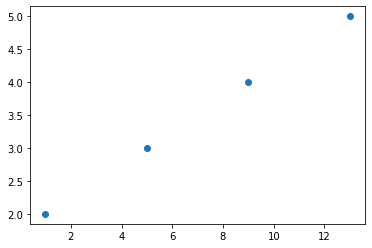

In [37]:
pyplot.scatter(coords[:, 0], coords[:, 1])

pyplot.show()

We can overlay multiple sets of points on a figure by just using the plotting function multiple times before `show()`. `matplotlib` even helpfully draws each set of points in a different color.

For our example, we can use this to overlay our rotated coordinates on the original ones, to see whether the angle of rotation looks right:

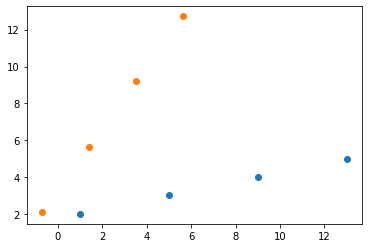

In [38]:
rotated_coords = coordinates.rotate(coords, 45)

pyplot.scatter(coords[:, 0], coords[:, 1])
pyplot.scatter(rotated_coords[:, 0], rotated_coords[:, 1])

pyplot.show()

### Customizing plots

Often we will want to specify a few more details about the appearance of our plots. `matplotlib` provides lots and lots of additional functions for adding features to a plot, and these functions accept many keyword arguments for changing things like colors, types of dots and lines, etc.

To demonstrate the general idea, we will add just one slight flourish to our plot. It would be nice to have some lines on the plot showing the center of the coordinate space, so that we can verify that the points have been rotated around this center. And it would be nice if these lines were black rather than `matplotlib`'s default blue.

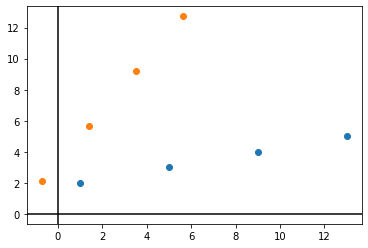

In [39]:
pyplot.scatter(coords[:, 0], coords[:, 1])
pyplot.scatter(rotated_coords[:, 0], rotated_coords[:, 1])
pyplot.axvline(x=0, color='black')
pyplot.axhline(y=0, color='black')

pyplot.show()

`matplotlib` can do a lot. But navigating its cornucopia of functions and arguments can be a real pain. For many specialized plotting tasks in data analysis, there are better packages available whose use is more straightforward. These packages still use `matplotlib` in the background, but they set the necessary colors, styles, axis labels, and so on automatically without our having to specify them all one by one.

We will learn more about other plotting packages later.

## Aliases

Once you are released into the wild and start reading more Python examples online, you will notice that some programs seem to refer to `numpy` as 'np' instead, and to `matplotlib.pyplot` as 'plt'. These programs begin by importing `numpy`, or `matplotlib` (or some other module) under an alternative name, sometimes called an [alias](glossary.ipynb#alias).

Such programs begin with [import](glossary.ipynb#import) statements that additionally use the `as` [keyword](glossary.ipynb#keyword) to import a module under a different name. Like this:

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In almost all cases, this slight difference from the standard method of importing is purely cosmetic. All it achieves is to allow the rest of the program to refer to the imported module by its alias. For example:

In [41]:
np.array([1, 2, 3])

array([1, 2, 3])

Certain conventions have arisen about these aliases. `numpy` is always 'np', `pyplot` is always 'plt', and `pandas` (which we met briefly in the [lesson on files](files.ipynb#pandas)) is always 'pd'. So you should be aware of these when you read other example programs.

There are a couple of situations in which it is a good idea to use an alias for an imported module:

* The name of the module is horribly long and the module is used often in the program. Using a much shorter alias can make the program less cluttered and easier to read.
* There are other things (other modules, variables, etc.) in the program that have, or might have, the same name as the module. Using an alias avoids these naming conflicts.

But in my semi-humble opinion, the common use of aliases for `numpy`, `pyplot`, `pandas`, and so on is a bit silly. Neither of the two situations above applies. These modules all have short names already, and you are probably more likely to want to call a variable in your program 'np' or 'pd' than you are to want to call it 'numpy' or 'pandas', unless you are doing research on actual pandas or have misspelled the word '[numpty](https://en.wiktionary.org/wiki/numpty)'.

So I won't use aliases in my examples, except in one or two cases where it really makes sense. You should do whatever you prefer. Just be consistent and if you use aliases use the conventional ones rather than ones you have invented yourself, so that others understand what is going on in your program.

## Exercise

In geometry, to [translate](https://en.wikipedia.org/wiki/Translation_(geometry)) some coordinates simply means to move them by a certain distance in a certain direction within the coordinate space. One way of representing this transformation is as the addition of a vector to the coordinates, as we learned above. For example, to move a pair of *(x,y)* coordinates 3 units rightward along the *x* axis and 2 units downward along the *y* axis we would add the vector *(3,-2)*.

Add a new function to the [coordinates.py](examples/coordinates.py) module, called `translate()`. Like `rotate()`, `translate()` should take as its first [argument](glossary.ipynb#argument) a 2-column `numpy` array representing some coordinates, and it should [return](glossary.ipynb#return) a transformed version of the coordinates. The second argument should be a [list](glossary.ipynb#list) (or a [tuple](glossary.ipynb#tuple), it doesn't matter) whose two entries give the distances by which to shift the coordinates along the *x* and *y* axes, respectively. So for the example of shifting the coordinates 3 units rightwards along the *x* axis and 2 units downward along the *y* axis, this argument would be `[3, -2]`.

It will probably help to test your function visually using `matplotlib` as you go along, to confirm that it works as expected.